In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
wine_data = load_wine()
df_features = wine_data.feature_names

In [3]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
df_data = pd.DataFrame(wine_data.data, columns = df_features)
df_labels = pd.DataFrame(wine_data.target, columns = ['label'])

In [5]:
data = pd.concat([df_data, df_labels], axis=1)

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
print('Invalid values in train = {}'.format(data.isnull().values.sum()))

Invalid values in train = 0


<Axes: xlabel='flavanoids', ylabel='hue'>

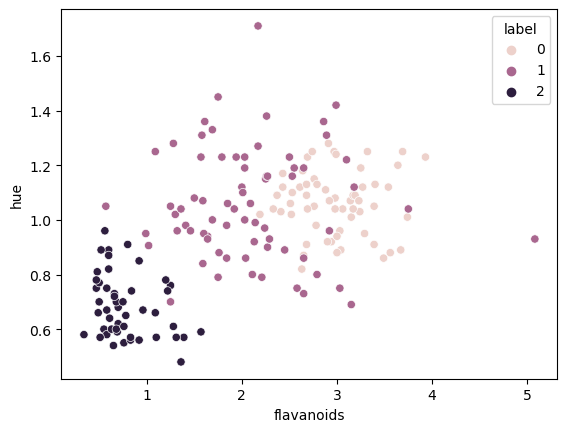

In [8]:
sns.scatterplot(x='flavanoids', y = 'hue', data = data, hue = data['label'])

Text(0.5, 1.0, 'Label')

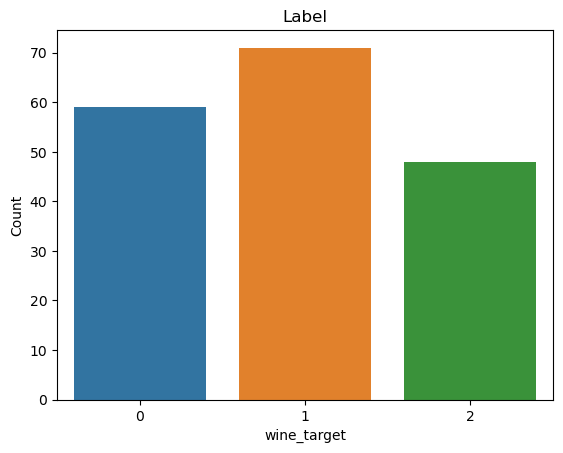

In [9]:
sns.countplot(data = data, x="label")
plt.xlabel("wine_target")
plt.ylabel("Count")
plt.title("Label")

<Axes: xlabel='flavanoids', ylabel='color_intensity'>

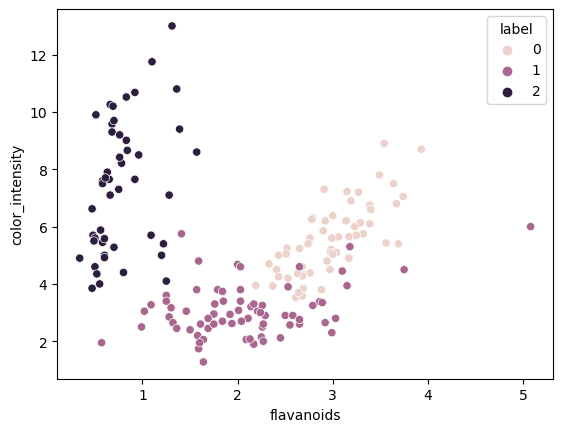

In [10]:
sns.scatterplot(x='flavanoids', y = 'color_intensity', data = data, hue = data['label'])

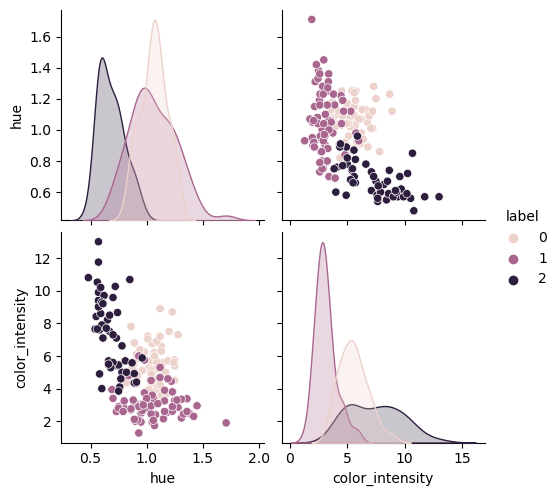

In [13]:
sns.pairplot(data,
             vars=['hue', 'color_intensity'],
            hue ='label')
plt.show()

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(df_data, df_labels, test_size = 0.2, stratify= df_labels )

In [15]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (142, 13)
y_train.shape : (142, 1)
X_test.shape: (36, 13)
y_test.shape: (36, 1)


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [19]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9722222222222222
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(train_scaled, y_train)

pred_nn = clf_nn.predict(test_scaled)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

C:\Users\procns\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- Neural Network Classifier ---
1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [23]:
print ("\n--- KNN ---")
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, y_train)
pred = kn.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- KNN ---
1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_scaled, y_train)

pred_lr = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))




--- Decision Tree Classifier ---
0.9444444444444444
[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]
